# Importing Libraries

In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\brigu\Anaconda3\envs\tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Data Cleaning

### Display Function

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

__Getting image and converting it to RGB from BGR__

In [3]:
img = cv2.imread('test_images/sharapova1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape

(555, 700, 3)

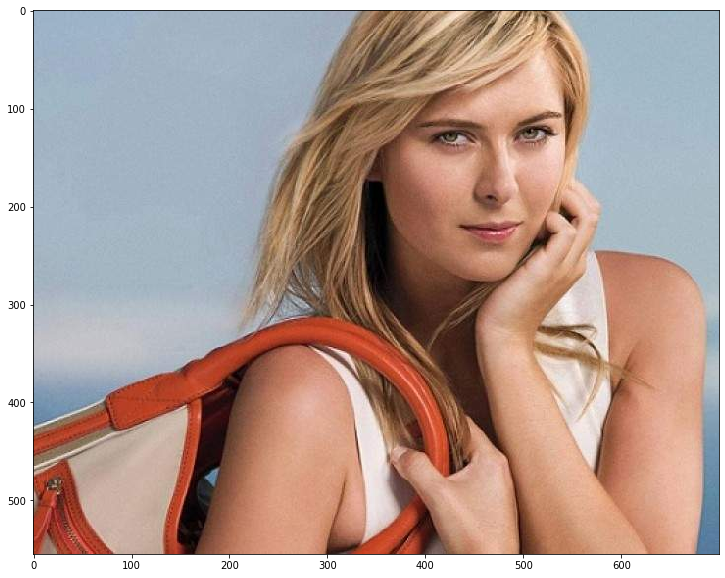

In [4]:
display(img)

__Converting image to gray scale for face and eye detection__

In [5]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(555, 700)

In [6]:
gray_img

array([[183, 183, 183, ..., 183, 182, 181],
       [183, 183, 183, ..., 184, 182, 181],
       [183, 183, 183, ..., 184, 183, 181],
       ...,
       [ 60,  62,  63, ..., 126, 126, 126],
       [ 64,  64,  65, ..., 126, 126, 126],
       [ 69,  66,  66, ..., 125, 125, 125]], dtype=uint8)

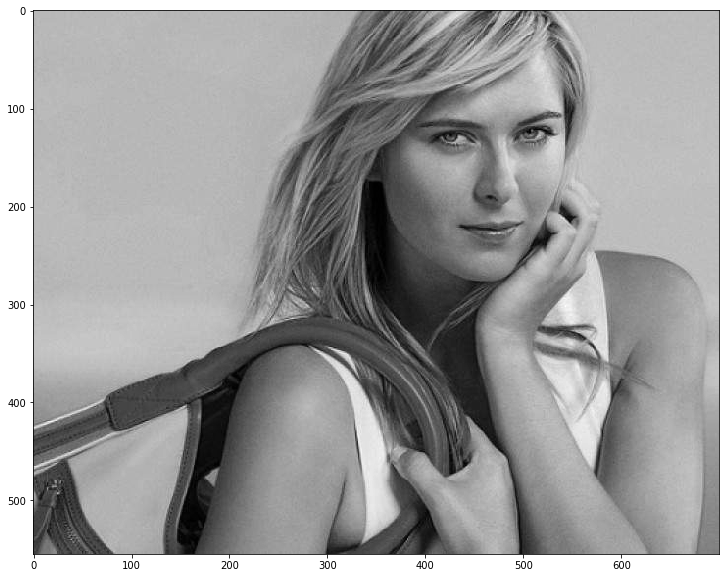

In [7]:
display(gray_img)

__Declaring face and eye cascade for face and eye detection__

In [8]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

face_rects = face_cascade.detectMultiScale(gray_img,scaleFactor=1.3,minNeighbors=5)
face_rects

array([[356,  37, 233, 233]], dtype=int32)

__Detecting face in the image__

In [9]:
face_img_copy = img.copy()

for (x,y,w,h) in face_rects:
    cv2.rectangle(face_img_copy,(x,y),(x+w,y+h),(255,255,255),4)

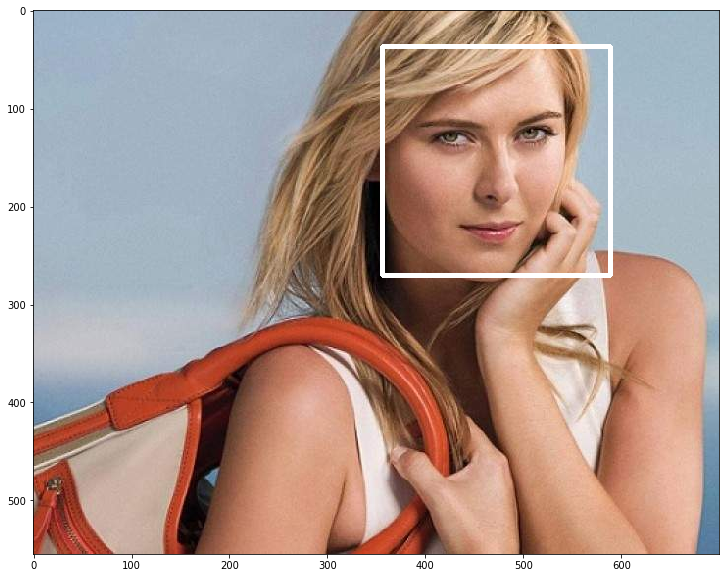

In [10]:
display(face_img_copy)

__Detecting face and eyes together in the image__

In [11]:
cv2.destroyAllWindows()

# face and eye detection
for (x,y,w,h) in face_rects:
    cv2.rectangle(face_img_copy,(x,y),(x+w,y+h),(255,255,255),4)
    roi_gray = gray_img[y:y+h,x:x+w]
    roi_color = face_img_copy[y:y+h,x:x+w]
    eye_rects = eye_cascade.detectMultiScale(roi_gray,scaleFactor=1.3,minNeighbors=5)
    
    # eye detection
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(roi_color,(x,y),(x+w,y+h),(255,0,0),4)

In [12]:
# number of eyes
len(eye_rects)

2

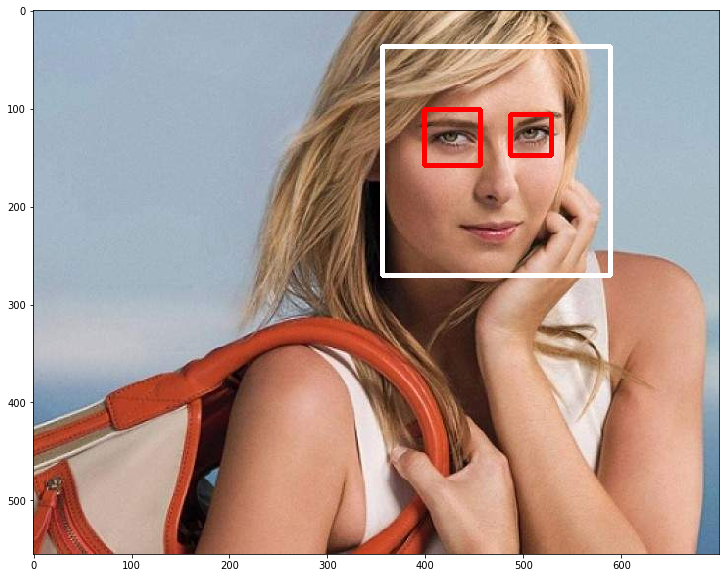

In [13]:
display(face_img_copy)

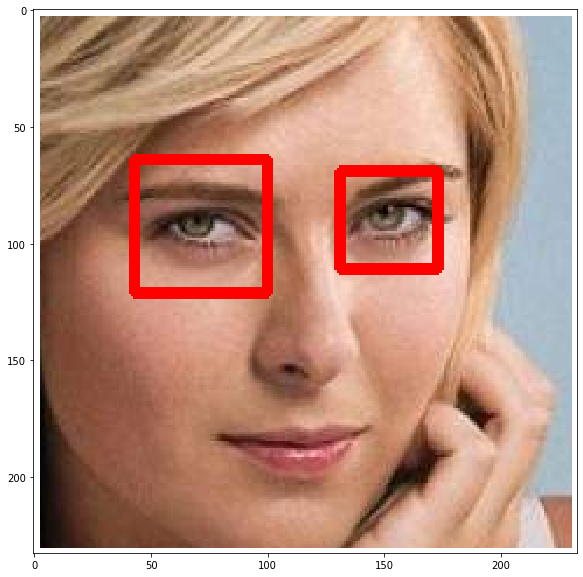

In [14]:
display(roi_color)

## Load image, detect face. If eyes >=2, then save and crop the face region

__Function to return the cropped image of the face if face and eyes are detected__

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_rects = face_cascade.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eye_rects = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eye_rects) >= 2:
            return roi_color

Original Image of Nadia Sharapova

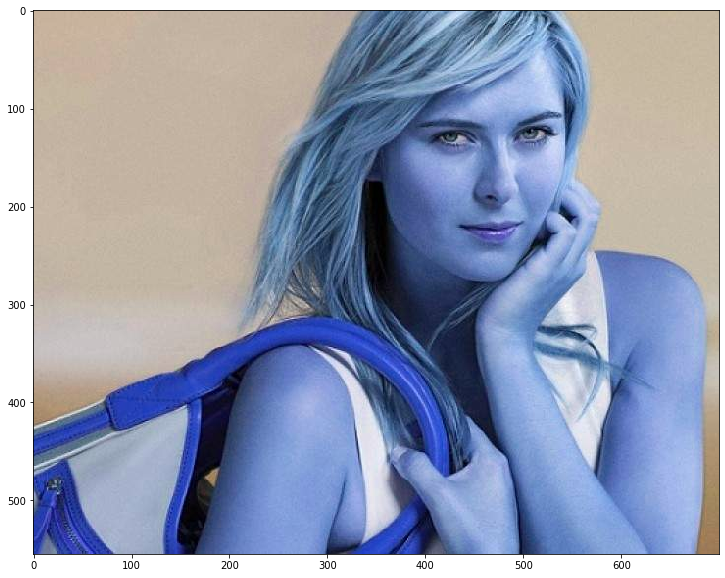

In [16]:
original_img = img = cv2.imread('test_images/sharapova1.jpg')
display(original_img)

Cropped Image of the Original Image of Maria Sharapova

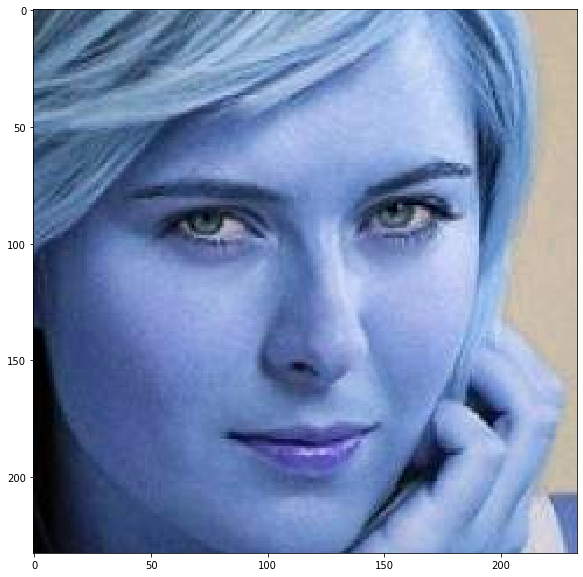

In [17]:
cropped_image = get_cropped_image_if_2_eyes('test_images/sharapova1.jpg')
display(cropped_image)

This Image is obstructed beacuse eyes are not visible or not easy to detect

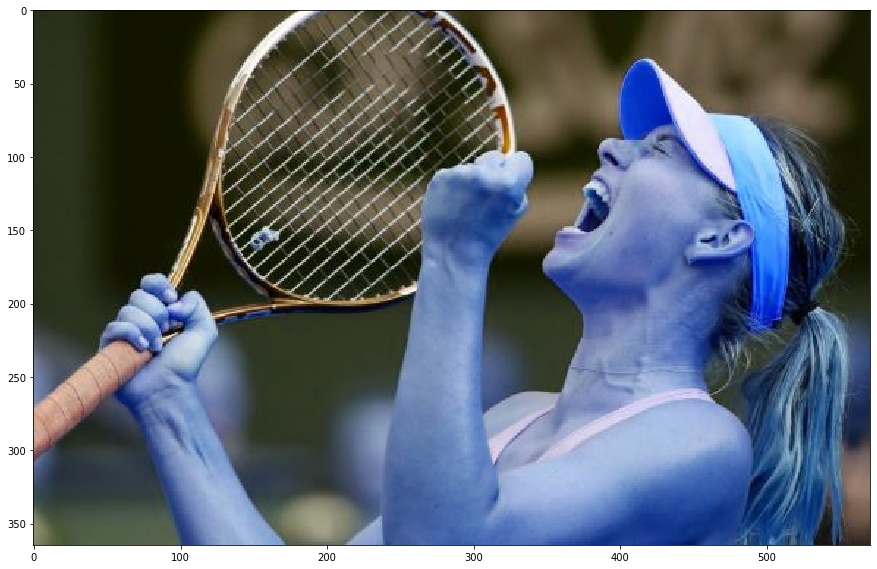

In [18]:
original_obstructed_img = img = cv2.imread('test_images/sharapova2.jpg')
display(original_obstructed_img)

When this image is passed to the _get_cropped_image_if_2_eyes()_ , the function will return __None__

In [19]:
cropped_image = get_cropped_image_if_2_eyes('test_images/sharapova2.jpg')
print(cropped_image)

None


__Creating _'cropped'_ folder to hold the sub directories of the celebrities__

In [20]:
path_to_data = './dataset/'
path_to_cropped_image_data = './dataset/cropped/'

__Creating Sub Directories__

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

__Creating sub directory with celebrity name, if already present then delete and created again__

In [23]:
import shutil
if os.path.exists(path_to_cropped_image_data):
    shutil.rmtree(path_to_cropped_image_data)
os.mkdir(path_to_cropped_image_data)

__In this Cell we are automatically cropping the faces of the celebrites, image paths are passing to the _get_cropped_image_if_2_eyes()_ which return the cropped images then we are saving it to the folder respective to the celebrity name.__

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

# looping through the celebrity sub directories
for img_dir in img_dirs:
    count = 1
    
    # getting celebrity name from the directory string.
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    # creating empty list in the dictionary with respective celebrity
    celebrity_file_names_dict[celebrity_name] = []
    
    # looping thorugh images in sub directories
    for entry in os.scandir(img_dir):
        
        # passing image paths to the get_cropped_image_if_2_eyes()
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cropped_image_data + celebrity_name
            
            # creating subfolders of the celebrities
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder: ',cropped_folder)
            
            # images path with .png extension
            cropped_file_name = celebrity_name + str(count) + '.png'   
            
            # cropped image file path
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            # saving the images to celebrity subdirectory
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


# Feature Engineering

## Use wavelet transform as a feature for traning our model

__In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc__

In [25]:
cropped_image = get_cropped_image_if_2_eyes('test_images/sharapova1.jpg')

In [26]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    
    # Datatype conversions
    # convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    
    # compute coefficients
    coeffs = pywt.wavedec2(imArray,mode,level)
    
    # process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

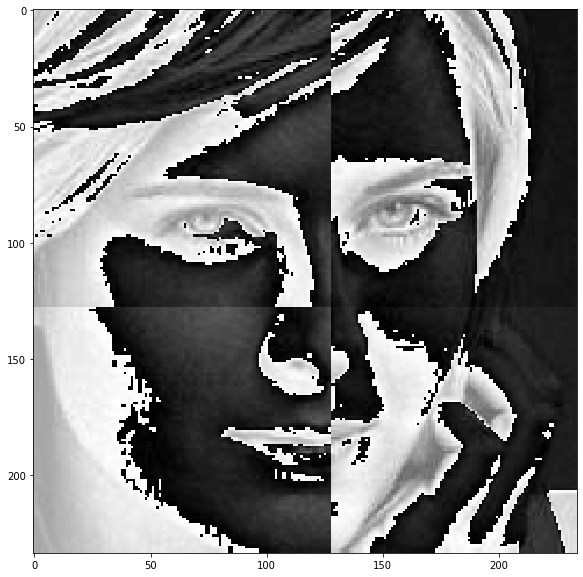

In [27]:
im_har = w2d(cropped_image,'db1',5)
display(im_har)

__You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier.__

In [28]:
celebrity_file_names_dict ={}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\

In [29]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

__Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare 'X' and 'y' now__

In [30]:
X = []
y = []
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32,32))
        img_hr = w2d(img,'db1',5)
        scaled_hr_img = cv2.resize(img_hr,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_hr_img.reshape(32*32,1)))
        
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [31]:
len(X)

212

In [32]:
len(y)

212

In [33]:
len(X[0])

4096

In [34]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [193],
       [190],
       [188]], dtype=uint8)

In [35]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(212, 4096)

In [36]:
X[0]

array([100., 129., 140., ..., 193., 190., 188.])

# Model Training

### We will use SVM with 'rbf' kernel tuned with heuristic finetuning

In [37]:
from sklearn.svm import  SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf',C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.813953488372093

In [39]:
print('Accuracy: ',accuracy_score(y_test, pipe.predict(X_test)))
print('\n\nClassification Report: \n\n',classification_report(y_test, pipe.predict(X_test)))

Accuracy:  0.813953488372093


Classification Report: 

               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.83      0.83      0.83         6
           2       0.83      0.71      0.77         7
           3       0.73      0.73      0.73        11
           4       0.86      1.00      0.92        12

    accuracy                           0.81        43
   macro avg       0.82      0.80      0.80        43
weighted avg       0.81      0.81      0.81        43



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [41]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [42]:
import pandas as pd

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    classifier =  GridSearchCV(pipe, 
                               mp['params'], 
                               cv=5,
                               n_jobs = -1, 
                               return_train_score=False
                              )
    classifier.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': classifier.best_score_,
        'best_params': classifier.best_params_
    })
    best_estimators[algo] = classifier.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.857576,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.715686,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.881996,{'logisticregression__C': 1}


In [43]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='rbf', max_iter=-1, probability=True,
                      random_state=None, shrinking=True, tol=0.001,
                      verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                     

In [44]:
best_estimators['svm'].score(X_test,y_test)

0.813953488372093

In [45]:
best_estimators['random_forest'].score(X_test,y_test)

0.6511627906976745

In [46]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.813953488372093

In [48]:
cm = confusion_matrix(y_test, best_estimators['svm'].predict(X_test))
cm

array([[ 5,  1,  0,  1,  0],
       [ 0,  5,  0,  1,  0],
       [ 1,  0,  5,  1,  0],
       [ 0,  0,  1,  8,  2],
       [ 0,  0,  0,  0, 12]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix')

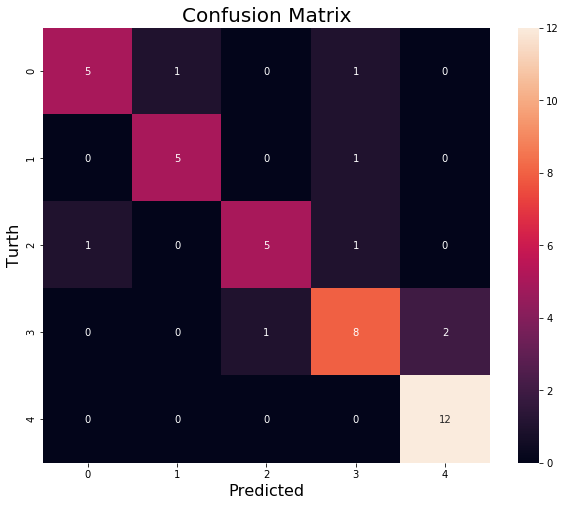

In [49]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted',fontsize=16)
plt.ylabel('Turth',fontsize=16)
plt.title('Confusion Matrix', fontsize=20)

__Traning the model on the whole dataset for best results__

In [50]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [51]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    classifier =  GridSearchCV(pipe, 
                               mp['params'], 
                               cv=5,
                               n_jobs = -1, 
                               return_train_score=False
                              )
    classifier.fit(X,y)
    scores.append({
        'model': algo,
        'best_score': classifier.best_score_,
        'best_params': classifier.best_params_
    })
    best_estimators[algo] = classifier.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.834551,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.679181,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.867663,{'logisticregression__C': 1}


In [52]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='linear', max_iter=-1,
                      probability=True, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                   

In [53]:
best_classifier = best_estimators['logistic_regression']

In [54]:
best_classifier

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

### Save the trained model

In [55]:
import pickle
with open('final_model.pickle','wb') as f:
    pickle.dump(best_classifier,f)

### Save class dictionary

In [120]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))